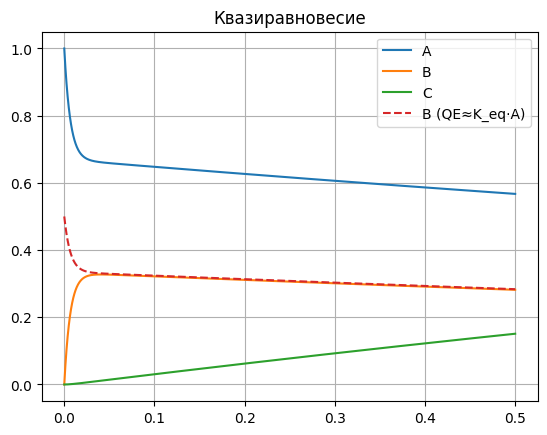

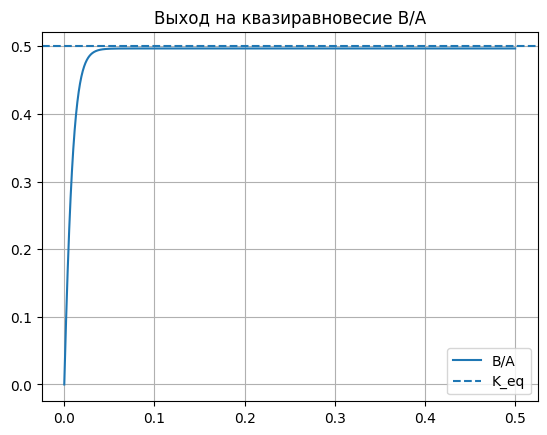

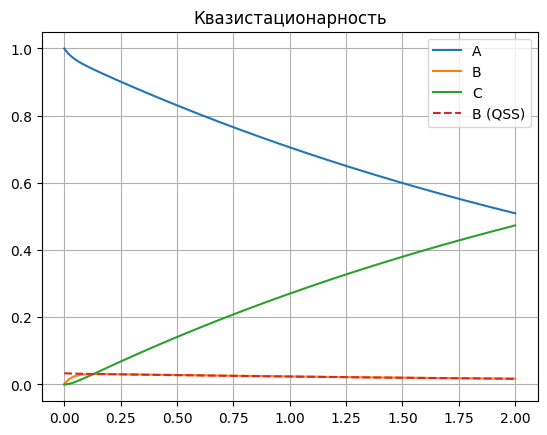

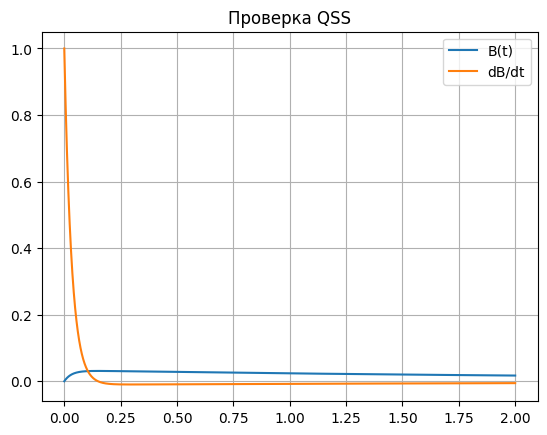

In [1]:

# Квазиравновесное и квазистационарное приближения — расчёты и графики

import numpy as np
import matplotlib.pyplot as plt

def eigenvalues(k1, k2, k3):
    Delta = np.sqrt((k1 + k2 + k3)**2 - 4*k1*k3)
    lam1 = -((k1 + k2 + k3) - Delta)/2
    lam2 = -((k1 + k2 + k3) + Delta)/2
    return lam1, lam2

def exact_solutions(t, k1, k2, k3, A0=1.0):
    lam1, lam2 = eigenvalues(k1, k2, k3)
    A_t = A0*((lam1+k2+k3)*np.exp(lam1*t)-(lam2+k2+k3)*np.exp(lam2*t))/(lam1-lam2)
    B_t = A0*k1*(np.exp(lam1*t)-np.exp(lam2*t))/(lam1-lam2)
    C_t = A0 - A_t - B_t
    return A_t, B_t, C_t

def dB_dt(A, B, k1, k2, k3):
    return k1*A - (k2+k3)*B

# Квазиравновесие
k1_qe, k2_qe, k3_qe = 50, 100, 1
t_qe = np.linspace(0, 0.5, 2000)
A_qe, B_qe, C_qe = exact_solutions(t_qe, k1_qe, k2_qe, k3_qe)

K_eq = k1_qe/k2_qe
B_qe_approx = K_eq * A_qe

plt.figure()
plt.plot(t_qe, A_qe, label='A')
plt.plot(t_qe, B_qe, label='B')
plt.plot(t_qe, C_qe, label='C')
plt.plot(t_qe, B_qe_approx, '--', label='B (QE≈K_eq·A)')
plt.legend(); plt.grid(); plt.title("Квазиравновесие"); plt.show()

# Отношение B/A
plt.figure()
plt.plot(t_qe, B_qe/A_qe, label='B/A')
plt.axhline(K_eq, linestyle='--', label='K_eq')
plt.legend(); plt.grid(); plt.title("Выход на квазиравновесие B/A"); plt.show()

# Квазистационарность
k1_qss, k2_qss, k3_qss = 1, 20, 10
t_qss = np.linspace(0, 2, 2000)
A_qss, B_qss, C_qss = exact_solutions(t_qss, k1_qss, k2_qss, k3_qss)
dB_qss = dB_dt(A_qss, B_qss, k1_qss, k2_qss, k3_qss)

B_qss_approx = k1_qss/(k2_qss+k3_qss) * A_qss

plt.figure()
plt.plot(t_qss, A_qss, label='A')
plt.plot(t_qss, B_qss, label='B')
plt.plot(t_qss, C_qss, label='C')
plt.plot(t_qss, B_qss_approx, '--', label='B (QSS)')
plt.legend(); plt.grid(); plt.title("Квазистационарность"); plt.show()

plt.figure()
plt.plot(t_qss, B_qss, label='B(t)')
plt.plot(t_qss, dB_qss, label='dB/dt')
plt.legend(); plt.grid(); plt.title("Проверка QSS"); plt.show()
